In [49]:
import pandas as pd
import numpy as np
import re 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
import pickle
import joblib
print("all neccessary library are imported")

all neccessary library are imported


In [50]:
x,y=[],[]
with open('Data/SMSSpamCollection.txt','r') as file:
    data=file.read()
    for data_item in  data.split('\n'):
        if len(data_item.split('\t'))==2:
            y.append(data_item.split('\t')[0])
            x.append(data_item.split('\t')[1])
print("successfully read the data from the text file and splitted into x and y")

successfully read the data from the text file and splitted into x and y


In [51]:
len(x),len(y)

(5574, 5574)

In [52]:
data_dict={"mail_message":x,"label":y}
df=pd.DataFrame(data_dict)
df.head()

,mail_message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mail_message  5574 non-null   object
 1   label         5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [54]:
for i in range(0,len(df)):
    message = re.sub('[^a-zA-Z]',' ',df['mail_message'][i])
    message = message.lower()
    df['mail_message'][i]=message
df.head(10)

C:\Users\rizwan\AppData\Local\Temp\ipykernel_4688\3959327020.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['mail_message'][i]=message


,mail_message,label
0,go until jurong point crazy available only ...,ham
1,ok lar joking wif u oni,ham
2,free entry in a wkly comp to win fa cup fina...,spam
3,u dun say so early hor u c already then say,ham
4,nah i don t think he goes to usf he lives aro...,ham
5,freemsg hey there darling it s been week s n...,spam
6,even my brother is not like to speak with me ...,ham
7,as per your request melle melle oru minnamin...,ham
8,winner as a valued network customer you have...,spam
9,had your mobile months or more u r entitle...,spam


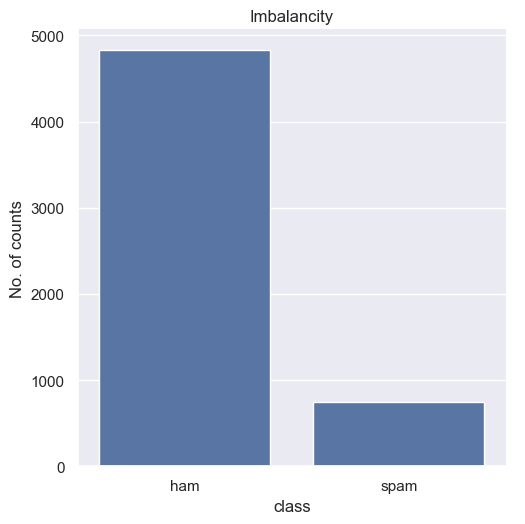

In [55]:
classs = list(df['label'].value_counts().index)
valu = list(df['label'].value_counts().values)
sb.set(rc={'figure.figsize':(8,20)})
sb.catplot(x=classs,y=valu,kind='bar')
plt.title("Imbalancity")
plt.xlabel("class")
plt.ylabel("No. of counts")
plt.show()

In [56]:
df['label'].value_counts()

label
ham     4827
spam     747
Name: count, dtype: int64

In [57]:
df.sample(2000)

,mail_message,label
2343,double your mins txts on orange or price...,spam
4119,watch lor i saw a few swatch one i thk quite ...,ham
2646,sorry i ll call later,ham
4080,o i played smash bros lt gt religiously,ham
5502,love has one law make happy the person you lo...,ham
...,...,...
4095,how are you i miss you,ham
5206,how come she can get it should b quite diff t...,ham
4021,university of southern california,ham
551,imagine you finally get to sink into that bath...,ham


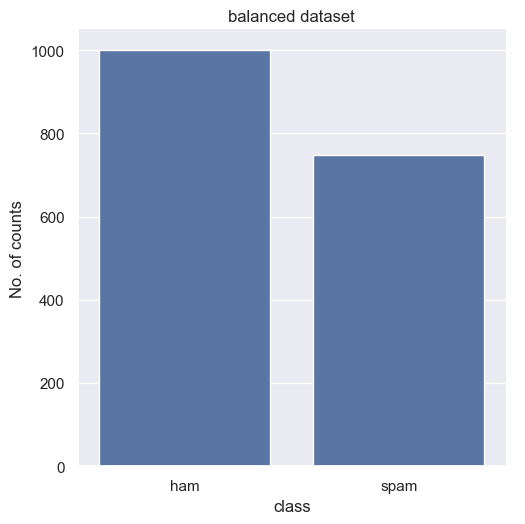

In [58]:
# filtering the dataset
ham=df[df['label']=='ham'].sample(1000)
spam=df[df['label']=='spam']

# concatenation of dataset
balance_df=pd.concat([ham,spam])

# visualizing the dataset 
classs = list(balance_df['label'].value_counts().index)
valu = list(balance_df['label'].value_counts().values)
sb.set(rc={'figure.figsize':(8,20)})
sb.catplot(x=classs,y=valu,kind='bar')
plt.title("balanced dataset")
plt.xlabel("class")
plt.ylabel("No. of counts")
plt.show()

In [59]:
balance_df['label']=balance_df['label'].map({'ham':0,'spam':1})

In [60]:
balance_df.isnull().sum()

mail_message    0
label           0
dtype: int64

In [61]:
print("duplicates in our dataset are ",balance_df.duplicated().sum())
print("shape of our dataset after removing duplicates ",balance_df.shape)

duplicates in our dataset are  140
shape of our dataset after removing duplicates  (1747, 2)


In [62]:
balance_df.drop_duplicates(inplace=True)

In [63]:
print("duplicates in our dataset are ",balance_df.duplicated().sum())
print("shape of our dataset after removing duplicates",balance_df.shape)

duplicates in our dataset are  0
shape of our dataset after removing duplicates (1607, 2)


In [64]:
x=balance_df['mail_message']
y=balance_df['label']

In [65]:
y.head()

4400    0
1388    0
245     0
4515    0
3120    0
Name: label, dtype: int64

In [66]:
x=x.values
x[0:5]

array(['yes just finished watching days of our lives  i love it ',
       'hope ur head doesn t hurt   much   am ploughing my way through a pile of ironing   staying in with a chinky tonight come round if you like ',
       'u don t remember that old commercial ',
       'sure  whenever you show the fuck up  gt   ',
       'stop knowing me so well '], dtype=object)

In [67]:
x.shape

(1607,)

# BOW
### Bag of words is used to get the track record of word occurences in the file  using the CountVectorizer

In [68]:
BOW_obj=CountVectorizer(max_features=2000,stop_words='english')


In [69]:
x.shape,type(x)

((1607,), numpy.ndarray)

In [70]:
x_transformed=BOW_obj.fit_transform(x)

In [71]:
x_transformed

<1607x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 12588 stored elements in Compressed Sparse Row format>

In [72]:
dense_matrix=x_transformed.toarray()
dense_matrix.shape

(1607, 2000)

In [73]:
joblib.dump(BOW_obj,'vectorizer.lb')

['vectorizer.lb']

In [74]:
x=dense_matrix
x.shape, y.shape

((1607, 2000), (1607,))

In [75]:
x_trian,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# $ MULTINONIAL $ $ NB $

In [76]:
MNB= MultinomialNB()

In [77]:
MNB.fit(x_trian,y_train)

MultinomialNB()

# $ Accuracy $

In [78]:
MNB.score(x_trian,y_train)

0.9758754863813229

In [79]:
MNB.score(x_test,y_test)

0.9596273291925466

# $ PREDICTION $

In [80]:
pre=MNB.predict(x_test)

In [81]:
confusion_matrix(y_test,pre)

array([[173,  10],
       [  3, 136]], dtype=int64)

# $ PLOT $

<Axes: >

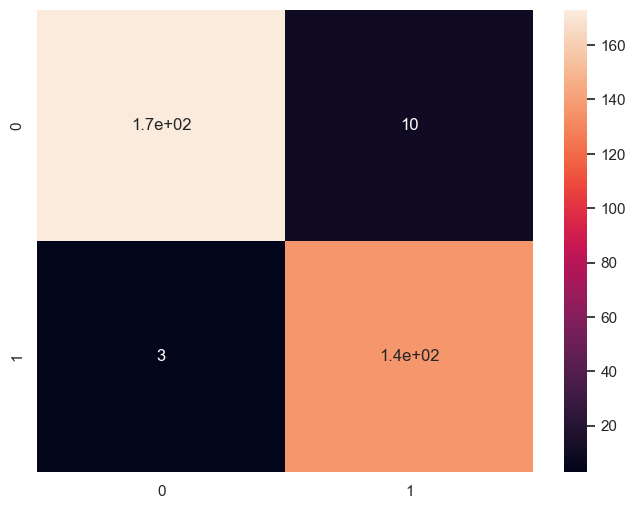

In [82]:
plt.figure(figsize=(8,6))
sb.heatmap(confusion_matrix(y_test,pre),annot=True)

In [83]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       183
           1       0.93      0.98      0.95       139

    accuracy                           0.96       322
   macro avg       0.96      0.96      0.96       322
weighted avg       0.96      0.96      0.96       322



In [84]:
pickle.dump(MNB,open('spamClassifier_mnb.pkl','wb'))
# to save the model

In [85]:
pickle.dump(BOW_obj,open('Vectorizer.pkl','wb'))

In [86]:
model=pickle.load(open('spamClassifier_mnb.pkl','rb'))
# to load the model

In [87]:
compare_dict={'actual':y_test,'pre':pre}
comparison_df=pd.DataFrame(compare_dict)
comparison_df.head(10)

,actual,pre
3780,1,1
71,0,0
812,0,1
3298,1,1
3682,0,0
3403,0,0
66,0,0
2332,0,0
1762,0,0
4379,0,0
